<a href="https://colab.research.google.com/github/hobu/pysde/blob/master/autzen_copc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install_mambaforge()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:32
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
%%bash
mamba install -q python-pdal gdal

In [ ]:
import pdal
import logging

In [ ]:
stadium = '''POLYGON ((-123.068875586721 44.0592277937513,-123.068425255932 44.0593017731328,-123.067936238336 44.0592489909417,-123.067495909125 44.059043544671,-123.067101851709 44.0586296501919,-123.067099413306 44.0580633355964,-123.067333190515 44.0575874173305,-123.067852567837 44.0573204352561,-123.068290450314 44.0572148305385,-123.068899280712 44.0572250214092,-123.069338909397 44.0574145238262,-123.069655618141 44.0578301571477,-123.069799646794 44.0580901477556,-123.069828689995 44.0585042983316,-123.069657775977 44.0588990323626,-123.068875586721 44.0592277937513))'''

# add our SRS to the stadium WKT so PDAL can project it for us
stadium = stadium  + ' / EPSG:4326'

reader = pdal.Reader.copc("https://s3.amazonaws.com/hobu-lidar/autzen-classified.copc.laz", requests=3, resolution=10.0)

# we need to scale the Intensity to 8-bit so we c
# can view it. LAS intensity is supposed to be 16 bit data, and 
# it is in this file's case

assign = pdal.Filter.assign(value = "Intensity = Intensity / 255")

writer = pdal.Writer.gdal("autzen.tif", resolution=8.0, dimension="Intensity", data_type="uint8", output_type="mean")


In [ ]:
pipeline = reader | assign | writer
pipeline.loglevel = logging.DEBUG

Is this pipeline streamable? 

In [ ]:
print(pipeline.streamable)

True


In [ ]:
%%time 
results = pipeline.execute()
print (pipeline.log)

(pypipeline readers.copc Debug) GDAL debug: PROJ: proj_as_wkt: Open of /usr/local/share/proj failed
(pypipeline readers.copc Debug) GDAL debug: PROJ: proj_as_proj_string: Open of /usr/local/share/proj failed
(pypipeline readers.copc Debug) GDAL debug: PROJ: proj_crs_create_bound_crs_to_WGS84: Open of /usr/local/share/proj failed
(pypipeline readers.copc Debug) GDAL debug: PROJ: proj_as_proj_string: Open of /usr/local/share/proj failed
(pypipeline readers.copc Debug) GDAL debug: PROJ: proj_as_wkt: Open of /usr/local/share/proj failed
(pypipeline readers.copc Debug) GDAL debug: PROJ: proj_as_wkt: Open of /usr/local/share/proj failed
(pypipeline readers.copc Debug) GDAL debug: PROJ: proj_as_proj_string: Open of /usr/local/share/proj failed
(pypipeline readers.copc Debug) GDAL debug: PROJ: proj_crs_create_bound_crs_to_WGS84: Open of /usr/local/share/proj failed
(pypipeline readers.copc Debug) GDAL debug: PROJ: proj_as_proj_string: Open of /usr/local/share/proj failed
(pypipeline readers.co

In [ ]:
!gdal_translate autzen.tif autzen.png -scale 

Input file size is 429, 582
Warning 1: PROJ: proj_create_from_database: Open of /usr/local/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.


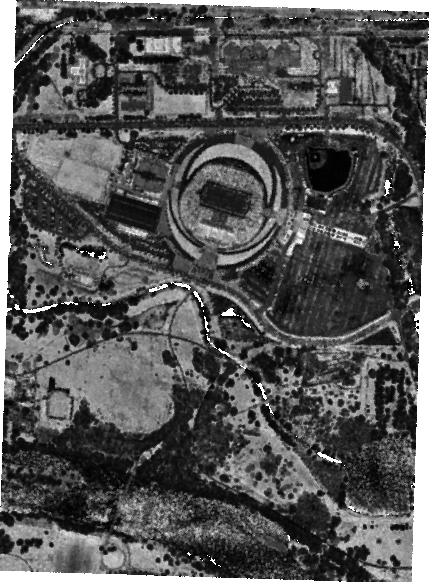

In [ ]:
from IPython.display import Image
Image(filename='autzen.png') 